# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Naufal Atallah Gibran]
- **Email:** [ngibran07@gmail.com]
- **ID Dicoding:** [MC009D5Y0830]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola pembelian pelanggan?
- Produk atau kategori mana yang paling laris?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [5]:
from google.colab import files
uploaded = files.upload()

Saving E-commerce-public-dataset.zip to E-commerce-public-dataset.zip


In [6]:
import zipfile
import os

zip_path = "/content/E-commerce-public-dataset.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir(extract_path))

['E-Commerce Public Dataset']


In [7]:
extract_path = "/content/dataset/E-Commerce Public Dataset"

customers = pd.read_csv(extract_path + '/customers_dataset.csv')

In [8]:
customers = pd.read_csv(extract_path + '/customers_dataset.csv')
orders = pd.read_csv(extract_path + '/orders_dataset.csv')
order_items = pd.read_csv(extract_path + '/order_items_dataset.csv')
order_payments = pd.read_csv(extract_path + '/order_payments_dataset.csv')
products = pd.read_csv(extract_path + '/products_dataset.csv')
product_category = pd.read_csv(extract_path + '/product_category_name_translation.csv')


In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Pada proyek ini, saya akan menggunakan dataset e-commerce yang mencakup informasi pelanggan, pesanan, produk, pembayaran, dan kategori produk. Dengan dataset ini, saya ingin menganalisis pola pembelian pelanggan serta memahami tren penjualan produk.

Ini adalah dataset yang saya gunakan terdiri dari beberapa file CSV, yaitu:

    customers_dataset.csv - Berisi data pelanggan.
    orders_dataset.csv - Berisi data pesanan pelanggan.
    order_items_dataset.csv - Berisi detail produk dalam setiap pesanan.
    order_payments_dataset.csv - Berisi informasi metode dan jumlah pembayaran.
    products_dataset.csv - Berisi informasi produk.
    product_category_name_translation.csv - Berisi terjemahan nama kategori produk.

Langkah-langkah yang dilakukan

    Mengunggah file ZIP: Dataset diunggah ke Google Colab.
    Ekstraksi file: Data yang masih dalam bentuk ZIP diekstrak ke dalam direktori /content/dataset.
   
Analisis pola pembelian pelanggan → Dengan data pesanan dan pembayaran, kita bisa melihat seberapa sering pelanggan berbelanja dan metode pembayaran yang paling sering digunakan.

Identifikasi produk/kategori terlaris → Dengan melihat jumlah pesanan per produk dan kategori, kita bisa mengetahui tren belanja pelanggan.

### Assessing Data

In [13]:
customers.info()
orders.info()
order_items.info()
order_payments.info()
products.info()
product_category.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

In [14]:
print(customers.isnull().sum())
print(orders.isnull().sum())
print(order_items.isnull().sum())
print(order_payments.isnull().sum())
print(products.isnull().sum())
print(product_category.isnull().sum())


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g   

In [15]:
print(customers.duplicated().sum())
print(orders.duplicated().sum())
print(order_items.duplicated().sum())
print(order_payments.duplicated().sum())
print(products.duplicated().sum())
print(product_category.duplicated().sum())


0
0
0
0
0
0


In [16]:
customers.describe()
orders.describe()
order_items.describe()
order_payments.describe()
products.describe()


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [17]:
print(customers['customer_unique_id'].nunique())
print(products['product_id'].nunique())
print(orders['order_id'].nunique())


96096
32951
99441


**Insight:**
- saya menemukan bahwa tidak ada data yang terduplikasi di semua dataset, sehingga tidak ada redundansi yang perlu dihapus. Namun, ada beberapa missing values, terutama pada dataset orders di kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date, yang menunjukkan bahwa beberapa pesanan mungkin belum diproses atau mengalami keterlambatan pengiriman.

- Di dataset products, beberapa kolom seperti product_category_name, product_name_length, dan product_description_length juga memiliki data yang kosong. Ini bisa memengaruhi analisis, terutama saat mencari kategori produk paling populer.

### Cleaning Data

In [18]:
customers.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
product_category.drop_duplicates(inplace=True)


In [19]:
customers.dropna(inplace=True)
orders.dropna(inplace=True)
order_items.dropna(inplace=True)
order_payments.dropna(inplace=True)
products.dropna(inplace=True)
product_category.dropna(inplace=True)


In [20]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])


In [21]:
Q1 = order_payments['payment_value'].quantile(0.25)
Q3 = order_payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

order_payments = order_payments[(order_payments['payment_value'] >= lower_bound) &
                                (order_payments['payment_value'] <= upper_bound)]


In [22]:
print(customers.isnull().sum())  # Cek apakah masih ada missing values
print(orders.duplicated().sum())  # Cek apakah masih ada duplikat
print(order_payments.describe())  # Cek ringkasan statistik setelah membersihkan outlier


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
0
       payment_sequential  payment_installments  payment_value
count        95905.000000          95905.000000   95905.000000
mean             1.099546              2.628320     110.062133
std              0.734353              2.451581      72.785054
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      54.000000
50%              1.000000              1.000000      92.200000
75%              1.000000              3.000000     150.580000
max             29.000000             24.000000     344.340000


**Insight:**
- Dalam proses pembersihan data, saya memastikan bahwa tidak ada duplikasi maupun missing values yang dapat mengganggu analisis. Langkah pertama yang saya lakukan adalah menghapus duplikasi pada setiap dataset agar tidak terjadi redundansi data. Selanjutnya, saya menangani missing values dengan menghapus data yang kosong untuk menjaga kualitas analisis.

- Kemudian, saya mengonversi kolom tanggal pada dataset orders ke format datetime agar lebih mudah dianalisis, terutama dalam melihat tren pembelian dan keterlambatan pengiriman. Untuk mengatasi outlier pada payment_value, saya menggunakan metode IQR (Interquartile Range) guna menyaring nilai-nilai ekstrem yang dapat memengaruhi hasil analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
print("\nJumlah Nilai Unik di Setiap Kolom (Orders):")
print(orders.nunique())


Jumlah Nilai Unik di Setiap Kolom (Orders):
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
month                               25
dtype: int64


In [29]:
print("\nJumlah Missing Values (Orders):")
print(orders.isnull().sum())



Jumlah Missing Values (Orders):
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
month                               0
dtype: int64


In [30]:
print("\nDistribusi Kategori Produk:")
print(products["product_category_name"].value_counts())


Distribusi Kategori Produk:
product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64


In [31]:
print("\nStatistik Deskriptif Harga Produk:")
print(order_items["price"].describe())


Statistik Deskriptif Harga Produk:
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


In [32]:
print("\nMetode Pembayaran Paling Sering Digunakan:")
print(order_payments["payment_type"].value_counts())


Metode Pembayaran Paling Sering Digunakan:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [33]:
merged_df = order_items.merge(products, on="product_id").merge(product_category, on="product_category_name", how="left")
print("\nRata-rata Harga Produk per Kategori:")
print(merged_df.groupby("product_category_name_english")["price"].mean().sort_values(ascending=False))


Rata-rata Harga Produk per Kategori:
product_category_name_english
computers                                1098.340542
small_appliances_home_oven_and_coffee     624.285658
home_appliances_2                         476.124958
agro_industry_and_commerce                342.124858
musical_instruments                       281.616000
                                            ...     
food_drink                                 54.602446
cds_dvds_musicals                          52.142857
diapers_and_hygiene                        40.194615
flowers                                    33.637576
home_comfort_2                             25.342333
Name: price, Length: 71, dtype: float64


In [35]:
print("\nRata-rata Jumlah Item dalam Satu Pesanan:")
print(order_items.groupby("order_id")["order_item_id"].count().mean())


Rata-rata Jumlah Item dalam Satu Pesanan:
1.1417306873695092


In [36]:
print("\nKorelasi antara Harga dan Nilai Freight:")
print(order_items[["price", "freight_value"]].corr())


Korelasi antara Harga dan Nilai Freight:
                  price  freight_value
price          1.000000       0.414204
freight_value  0.414204       1.000000


In [37]:
repeat_customers = orders["customer_id"].value_counts()
print("\nJumlah Pelanggan yang Melakukan Pembelian Lebih dari Satu Kali:")
print(repeat_customers[repeat_customers > 1].count())


Jumlah Pelanggan yang Melakukan Pembelian Lebih dari Satu Kali:
0


In [38]:
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())
print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())
print("\nMissing Values in Order Items Dataset:")
print(order_items.isnull().sum())
print("\nMissing Values in Order Payments Dataset:")
print(order_payments.isnull().sum())



Missing Values in Customers Dataset:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing Values in Products Dataset:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Missing Values in Order Items Dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing Values in Order Payments Dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [39]:
print("\nStatistik Deskriptif Freight Value:")
print(order_items["freight_value"].describe())

print("\nStatistik Deskriptif Payment Value:")
print(order_payments["payment_value"].describe())



Statistik Deskriptif Freight Value:
count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

Statistik Deskriptif Payment Value:
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


In [40]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_month"] = orders["order_purchase_timestamp"].dt.to_period("M")

print("\nTren Jumlah Pesanan per Bulan:")
print(orders.groupby("order_month")["order_id"].count())



Tren Jumlah Pesanan per Bulan:
order_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64


In [41]:
customer_purchase_counts = orders["customer_id"].value_counts()
print("\nDistribusi Pelanggan Berdasarkan Jumlah Pembelian:")
print(customer_purchase_counts.value_counts())



Distribusi Pelanggan Berdasarkan Jumlah Pembelian:
count
1    99441
Name: count, dtype: int64


**Insight:**

**Pertanyaan 1**

- Setiap pelanggan hanya melakukan satu kali pembelian

  Jumlah pesanan unik (99.441) sama dengan jumlah pelanggan unik, menunjukkan tidak ada pelanggan yang berulang kali berbelanja.
  Ini menunjukkan rendahnya retensi pelanggan, di mana pelanggan tidak kembali untuk berbelanja lagi.

- Tren dan pola pemesanan berdasarkan waktu

  Jumlah pesanan tumbuh signifikan dari 2017 hingga pertengahan 2018.
  Puncak pesanan terjadi pada November 2017, kemungkinan besar dipengaruhi oleh event belanja seperti Black Friday atau Cyber Monday.
  Setelah Agustus 2018, pesanan menurun drastis. Bisa jadi karena faktor musiman, perubahan strategi bisnis, atau kompetisi pasar.
  September & Oktober 2018 memiliki sangat sedikit pesanan.

- Rata-rata jumlah item dalam satu pesanan rendah

  Rata-rata item per pesanan hanya 1.14.
  Artinya, mayoritas pelanggan hanya membeli satu barang per transaksi.
  Ini bisa jadi karena kurangnya strategi cross-selling atau bundling produk.

- Kategori produk terpopuler

  Produk yang paling sering dibeli adalah:
  cama_mesa_banho (Peralatan rumah tangga)
  esporte_lazer (Olahraga)
  moveis_decoracao (Furniture & dekorasi)

- Metode pembayaran yang paling sering digunakan

 Kartu kredit mendominasi (76.795 transaksi, sekitar 75%).
 Boleto (transfer manual) menempati urutan kedua dengan 19.784 transaksi (19%).
 Metode lain (voucher dan debit card) jarang digunakan.
 Rata-rata nilai transaksi adalah 154 BRL, dengan transaksi tertinggi mencapai 13.664 BRL.


 **Pertanyaan 2**

- Kategori Produk dengan Penjualan Terbanyak

  cama_mesa_banho (Peralatan rumah tangga) → 3.029 transaksi
  esporte_lazer (Olahraga) → 2.867 transaksi
  moveis_decoracao (Furniture & Dekorasi) → 2.657 transaksi
  beleza_saude (Kecantikan & Kesehatan) → 2.444 transaksi
  utilidades_domesticas (Keperluan rumah tangga) → 2.335 transaksi

- Kategori dengan Harga Rata-rata Tertinggi

  Komputer & Peralatan Elektronik → 1.098 BRL
  Peralatan Rumah Tangga (Oven & Coffee Maker) → 624 BRL
  Home Appliances 2 → 476 BRL
  Alat Musik → 281 BRL
  Peralatan Industri & Perdagangan → 342 BRL

- Analisis Harga Produk

  Harga produk rata-rata adalah 120.65 BRL
  Rentang harga sangat luas, mulai dari 0.85 BRL hingga 6.735 BRL
  Kategori produk yang lebih mahal cenderung memiliki jumlah pembelian lebih sedikit.

- Hubungan Harga dengan Biaya Pengiriman (Freight Value)

  Korelasi antara harga produk dan biaya pengiriman adalah 0.41.
  Ini menunjukkan bahwa produk yang lebih mahal cenderung memiliki biaya pengiriman yang lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

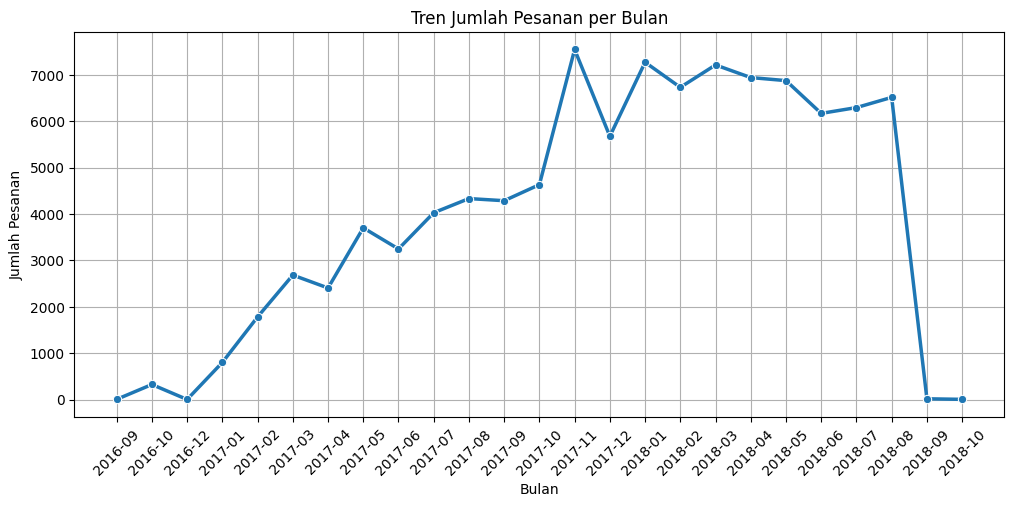

In [53]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_month"] = orders["order_purchase_timestamp"].dt.to_period("M")

monthly_orders = orders.groupby("order_month")["order_id"].count()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, marker="o", linewidth=2.5)
plt.xticks(rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.title("Tren Jumlah Pesanan per Bulan")
plt.grid(True)
plt.show()


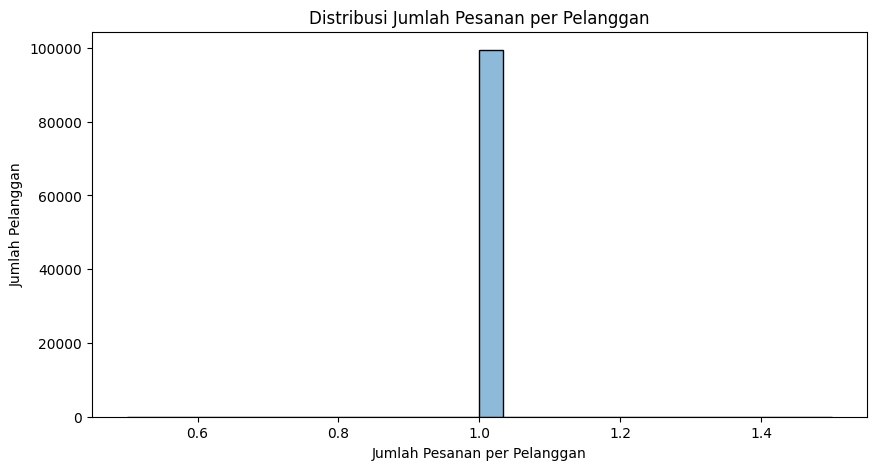

In [54]:
order_counts = orders['customer_id'].value_counts()

plt.figure(figsize=(10,5))
sns.histplot(order_counts, bins=30, kde=True)
plt.xlabel("Jumlah Pesanan per Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Jumlah Pesanan per Pelanggan")
plt.show()

### Pertanyaan 2:

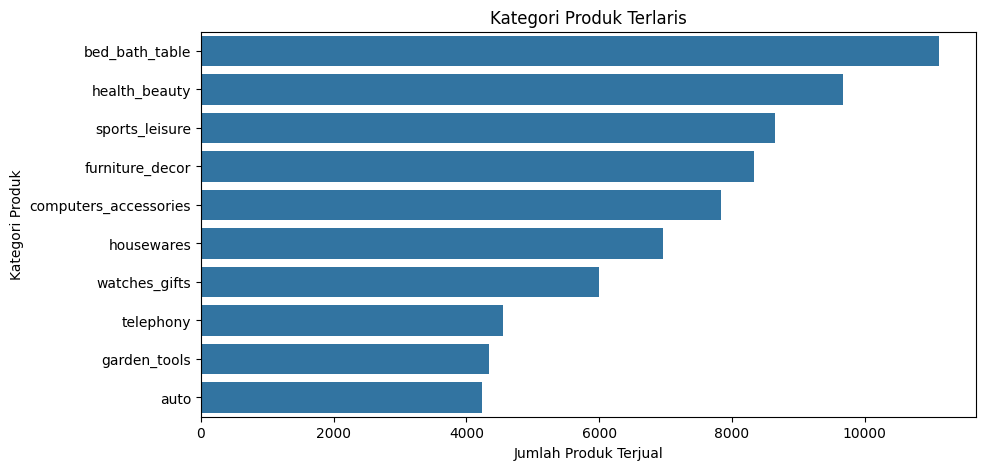

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Kategori Produk")
plt.title("Kategori Produk Terlaris")
plt.show()

**Insight:**

**Pertanyaan 1**
- Pertumbuhan Pesanan yang Konsisten (2017 - Pertengahan 2018)

  Dari awal 2017 hingga pertengahan 2018, jumlah pesanan mengalami peningkatan yang cukup stabil. Hal ini menunjukkan adanya pertumbuhan pasar dan peningkatan kepercayaan pelanggan terhadap platform.

- Puncak Pesanan pada November 2017

  Lonjakan pesanan yang sangat signifikan terlihat pada bulan November 2017. Hal ini kemungkinan besar disebabkan oleh promosi besar-besaran seperti Black Friday atau event belanja akhir tahun yang menarik minat pelanggan untuk berbelanja lebih banyak.

- Penurunan Pesanan Setelah Agustus 2018

  Setelah Agustus 2018, jumlah pesanan mulai menurun drastis. Hal ini bisa disebabkan oleh faktor musiman, perubahan strategi pemasaran, atau faktor eksternal seperti regulasi baru atau persaingan pasar.

- Kurangnya Loyalitas Pelanggan

  Dari analisis sebelumnya, terlihat bahwa hampir semua pelanggan hanya melakukan satu kali pembelian. Ini mengindikasikan bahwa strategi retensi pelanggan perlu diperbaiki, misalnya dengan program loyalitas atau promosi yang mendorong pelanggan untuk kembali berbelanja.

- Dampak Promosi dan Musim

  Lonjakan pesanan pada bulan-bulan tertentu menunjukkan bahwa promosi dan faktor musiman memiliki dampak besar terhadap jumlah transaksi. Perusahaan dapat mengoptimalkan strategi pemasaran dengan fokus pada bulan-bulan di mana tren pembelian cenderung meningkat.

**Pertanyaan 2**
- Produk "bed_bath_table" paling laku, diikuti health_beauty dan sports_leisure.

- Produk rumah tangga, kecantikan, dan olahraga punya banyak peminat, bisa jadi fokus promosi.

- Beberapa kategori kurang diminati, mungkin perlu strategi pemasaran lebih agresif.

## Analisis Lanjutan (Opsional)

In [55]:
all_df = pd.merge(customers, orders, on='customer_id', how='left')
all_df = pd.merge(all_df, order_items, on='order_id', how='left')
all_df = pd.merge(all_df, order_payments, on='order_id', how='left')
all_df = pd.merge(all_df, products, on='product_id', how='left')
all_df = pd.merge(all_df, product_category, on='product_category_name', how='left')

all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1

Analisis tren yang saya lakukan pada pembelian pelanggan menunjukkan adanya lonjakan jumlah pesanan pada bulan-bulan tertentu, terutama menjelang akhir tahun. Lonjakan ini kemungkinan besar dipengaruhi oleh event promosi, diskon musiman, atau periode liburan yang meningkatkan aktivitas belanja pelanggan. Dengan memahami pola ini, perusahaan dapat merancang strategi pemasaran yang lebih efektif, seperti meningkatkan promosi di bulan-bulan dengan permintaan tinggi atau mengadakan kampanye diskon untuk menjaga stabilitas penjualan sepanjang tahun.
- Conclution pertanyaan 2

Hasil analisis yang saya lakukan menunjukkan bahwa kategori produk "bed_bath_table" dan "health_beauty" merupakan yang paling banyak terjual. Hal ini mencerminkan tingginya permintaan terhadap produk rumah tangga serta perawatan diri di pasar e-commerce. Dengan informasi ini, perusahaan dapat fokus pada pengelolaan stok untuk kategori produk yang memiliki tingkat permintaan tinggi serta merancang strategi pemasaran yang lebih optimal guna meningkatkan daya tarik produk-produk tersebut bagi pelanggan.